In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df=pd.read_excel('Algerian_forest_fires_dataset_UPDATE.xlsx')

In [3]:
df.head()

,Bejaia Region Dataset,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In the given data, we can see that the header row is not set properly. Setting the header row first.

In [4]:
new_header = df.iloc[0]
df = df[1:]
df.columns=new_header
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
## Searching for any missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


We can see that the dataset is divided into two sections. we can set up a new column to defining the set of regions

In [6]:
df.loc[:124,'Region']=0
df.loc[124:,'Region']=1
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
1,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
5,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 1 to 247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4   RH           245 non-null    object 
 5   Ws           245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [8]:
#Changing the new column datatype
df[['Region']]=df[['Region']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 1 to 247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       247 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.1+ KB


In [9]:
#Finding and removing any present missing values
df.isnull().sum()

0
day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [21]:
df=df.dropna().reset_index(drop=True)

In [22]:
df.iloc[[124]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1


In [23]:
df=df.drop(125).reset_index(drop=True)

In [24]:
df.iloc[[125]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
125,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    object
 1   month        242 non-null    object
 2   year         242 non-null    object
 3   Temperature  242 non-null    object
 4   RH           242 non-null    object
 5   Ws           242 non-null    object
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
 14  Region       242 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.5+ KB


In [26]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [31]:
#Changing the datatype of the features as required
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    int32  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.9+ KB


In [32]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,15.809917,7.508264,2012.0,32.161157,62.033058,15.500000,0.766116,77.83595,14.719835,49.571488,4.752893,16.736364,7.060331,0.495868
std,8.828297,1.112888,0.0,3.632903,14.858354,2.815561,2.006754,14.37903,12.403638,47.713857,4.159608,14.239927,7.445804,0.501019
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.60000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.250000,14.000000,0.000000,71.62500,5.800000,11.425000,1.400000,6.025000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.50000,11.300000,33.250000,3.500000,12.450000,4.450000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.750000,17.000000,0.500000,88.30000,20.850000,70.050000,7.275000,22.775000,11.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.00000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [33]:
## Saving the cleaned data to a file
df.to_csv('Algerian_forest_fire_cleaned_dataset.csv',index=False)

## Exploratory Data Analysis

In [46]:
## Drop day month and year
df_copy=df.drop(['day','month','year'],axis=1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [47]:
df_copy['Classes'].value_counts()

fire        137
not fire    105
Name: Classes, dtype: int64

In [48]:
df_copy[['Classes']]=df_copy[['Classes']].astype(str)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  242 non-null    int32  
 1   RH           242 non-null    int32  
 2   Ws           242 non-null    int32  
 3   Rain         242 non-null    float64
 4   FFMC         242 non-null    float64
 5   DMC          242 non-null    float64
 6   DC           242 non-null    float64
 7   ISI          242 non-null    float64
 8   BUI          242 non-null    float64
 9   FWI          242 non-null    float64
 10  Classes      242 non-null    object 
 11  Region       242 non-null    int32  
dtypes: float64(7), int32(4), object(1)
memory usage: 19.0+ KB


In [49]:
## Encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


C:\Users\User\AppData\Local\Temp\ipykernel_19700\3219809621.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


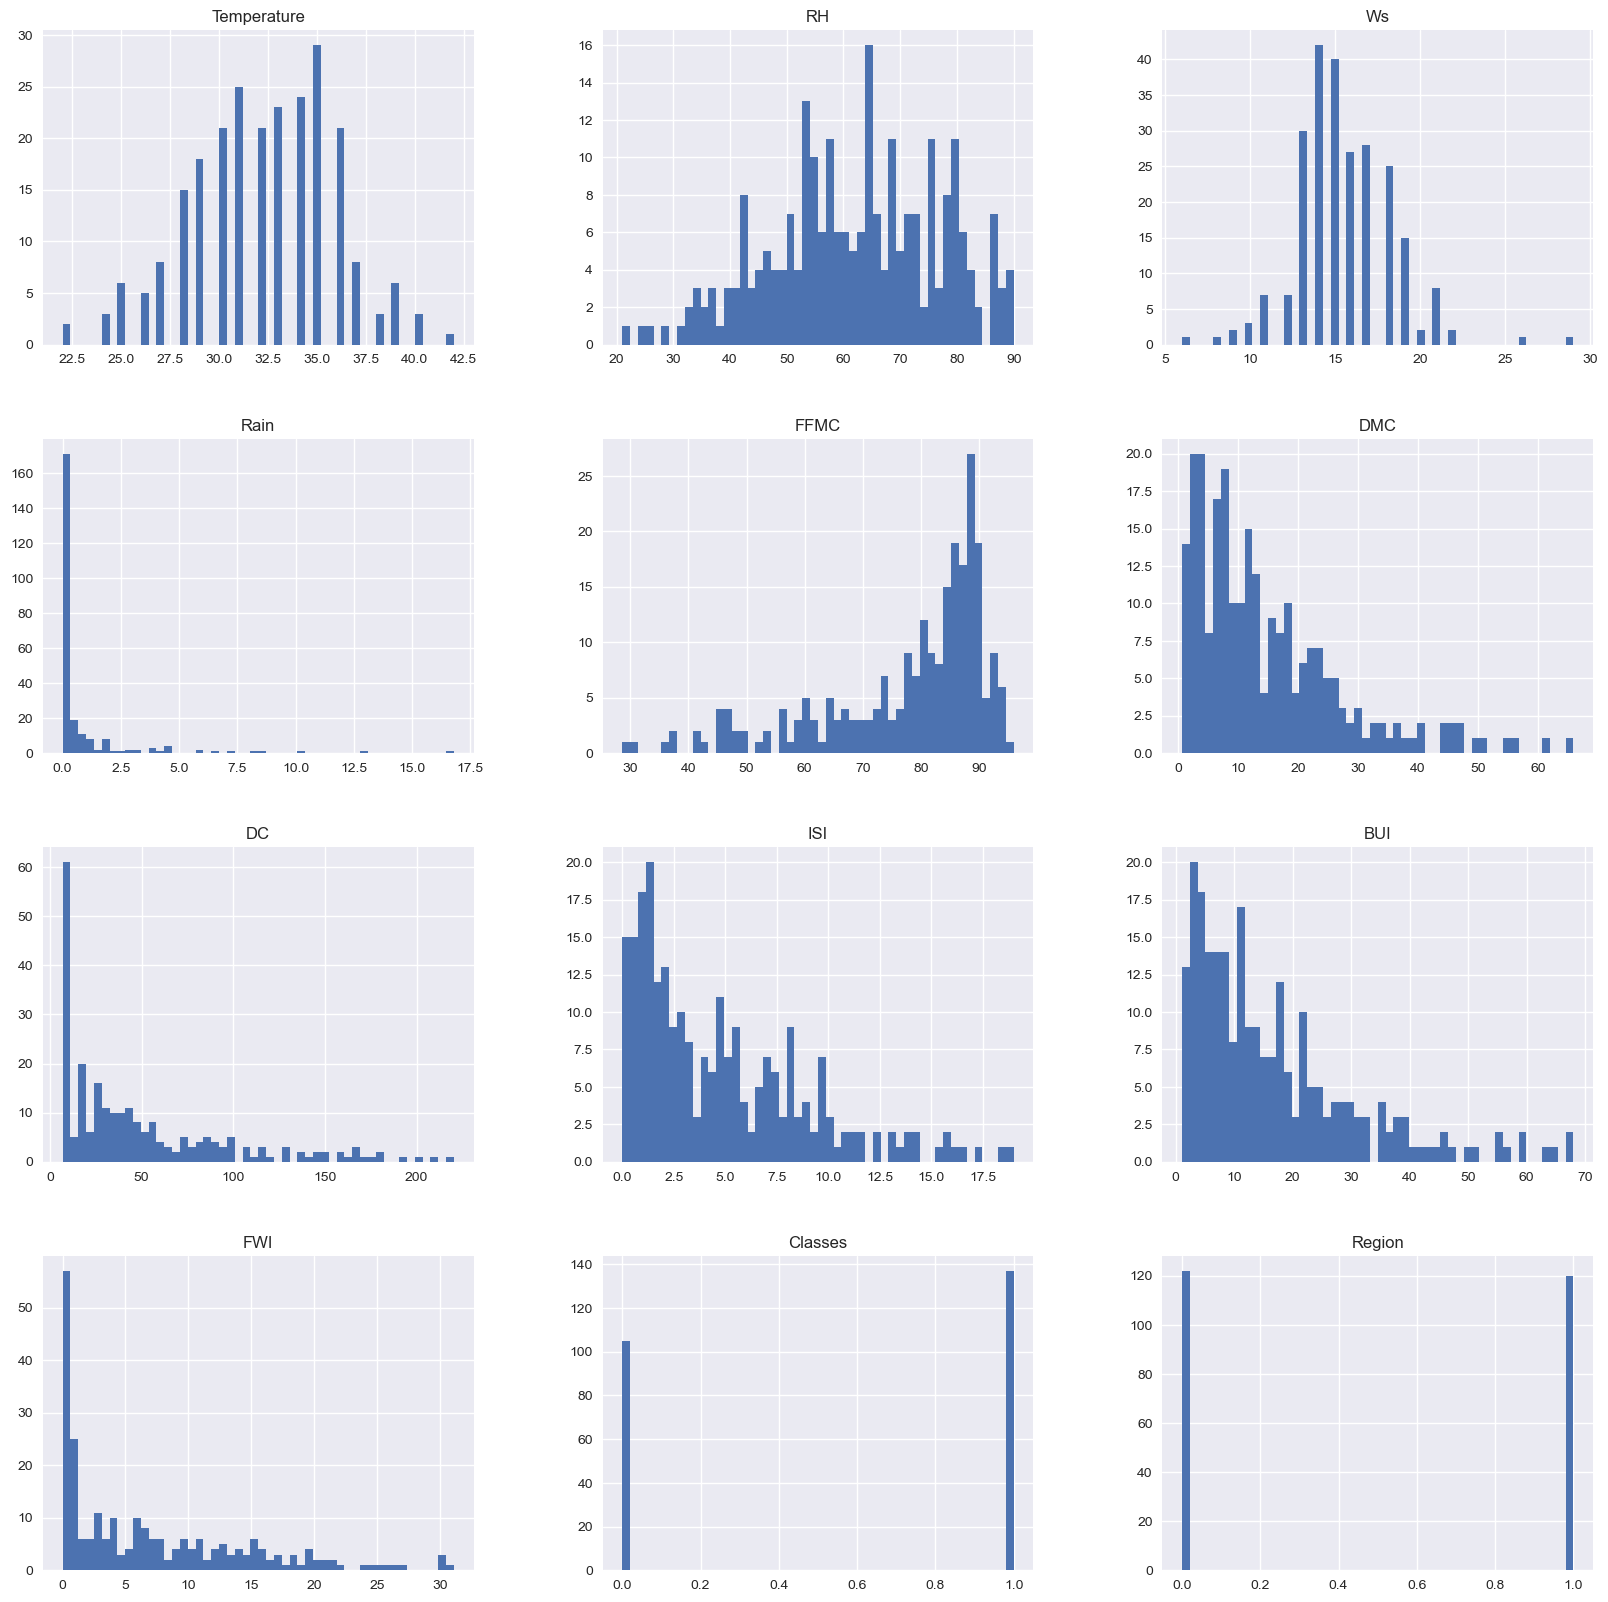

In [50]:
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,20))
plt.show()

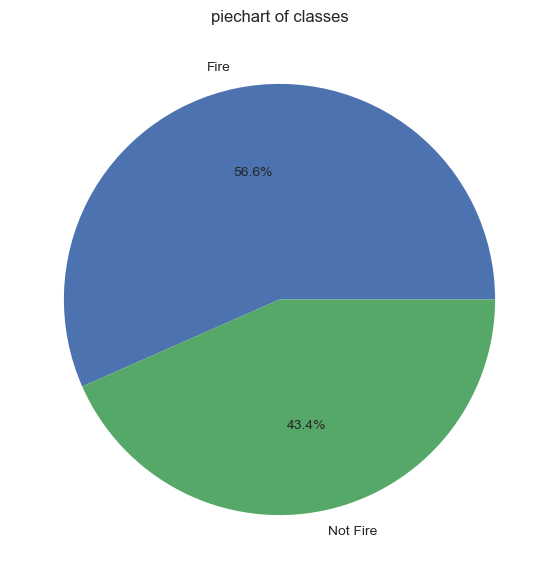

In [53]:
#plotting piechart
percentage=df_copy['Classes'].value_counts(normalize=True)*100
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("piechart of classes")
plt.show()

<Axes: xlabel='0', ylabel='0'>

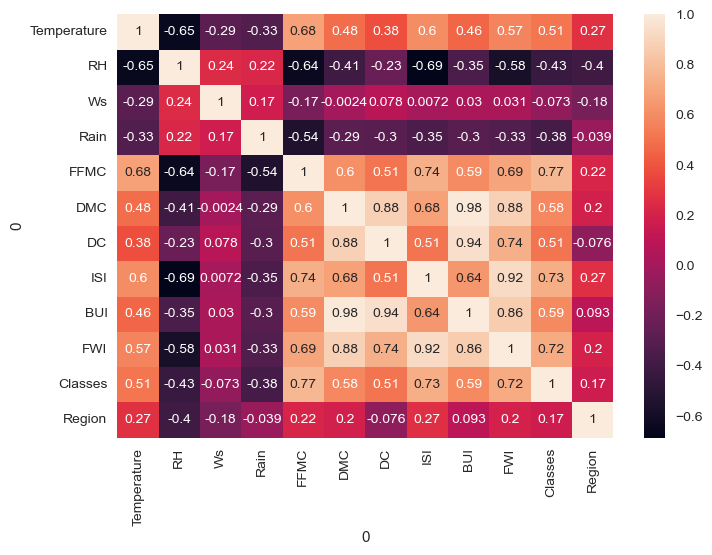

In [57]:
# Plotting Correlation Heatmap
sns.heatmap(df_copy.corr(),annot=True)

In [58]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire analysis of Sidi-Bel Regions')

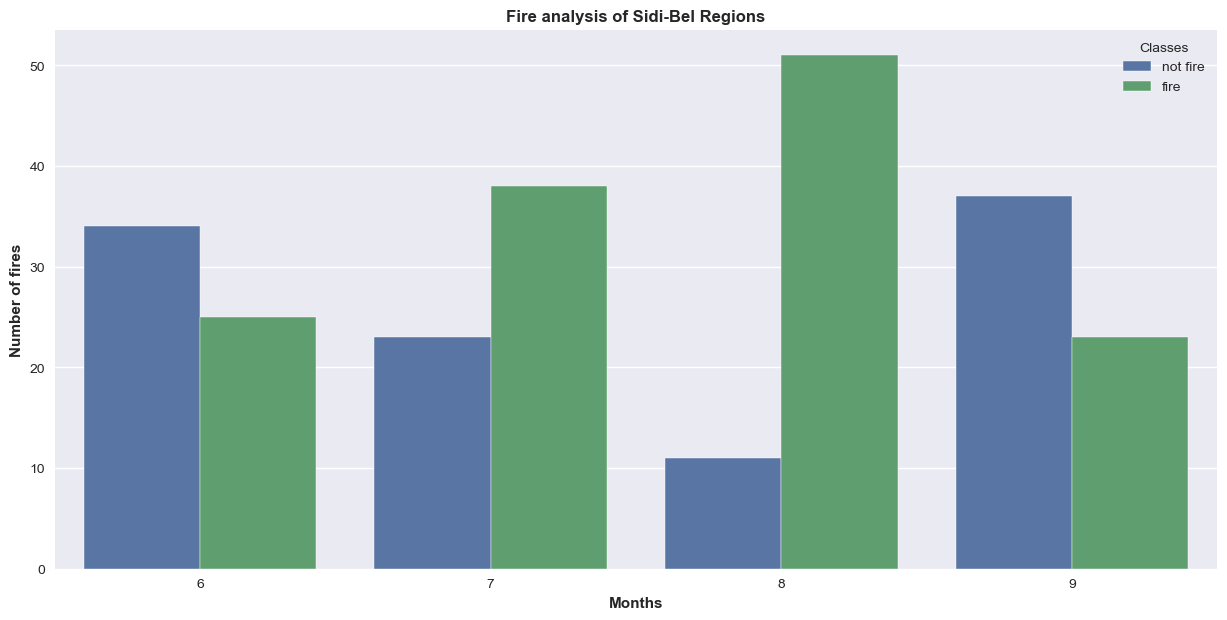

In [59]:
## Monthly fire analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(15,7))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel("Number of fires", weight='bold')
plt.xlabel("Months",weight='bold')
plt.title('Fire analysis of Sidi-Bel Regions', weight='bold')

## Model Training